**Método dos mínimos quadrados**

In [3]:
# Importar a biblioteca pasa uso de algoritmos matemáticos
import numpy as np

**Carregando valores do arquivo**

In [4]:
# Ler o arquivo .txt e extrair uma coluna específica
id = np.loadtxt('RR601BGE4S.txt', delimiter='\t', usecols=(0,))
vd = np.loadtxt('RR601BGE4S.txt', delimiter='\t', usecols=(1,))

**Filtrando dados para faixa da última decada**

In [5]:

posicao = np.argmax(id > 0.41)
vd_filtrado = vd[posicao:]
id_filtrado = id[posicao:]
Xi=np.array(id_filtrado)
Yi=np.array(vd_filtrado)


**Gerando gráfico para observar se há um comportamento linear**

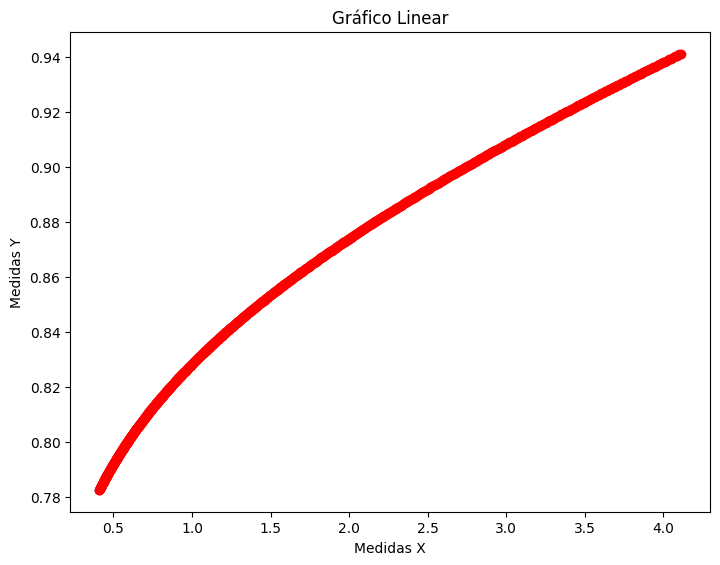

In [6]:
#Uma vez havendo um comportamento próximo ao linear pode aplicar-se o MMQ para ajuste linear
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(Xi, Yi, color='r')
#ax.scatter(grades_range, boys_grades, color='b')
ax.set_xlabel('Medidas X')
ax.set_ylabel('Medidas Y')
ax.set_title('Gráfico Linear')
plt.show()

In [7]:
# Entendendo um comportamento próximo do linear aplica-se o MMQ

#n significa o número de medida das variáveis
n=len(id_filtrado)

#Obtenção dos termos Xi^2 e Xi*Yi
Xi2=Xi**2
XiYi=Xi*Yi

#Cálculo dos coeficientes a e b pelo MMQ
a = (sum(Xi)*sum(Yi) -n*sum(XiYi))/(sum(Xi)**2 -n*sum(Xi2))
b = (sum(XiYi)*sum(Xi) - sum(Xi2)*sum(Yi))/(sum(Xi)**2 -n*sum(Xi2))
#print('O somatorio de X:',sum(Xi),"\n",'O somatorio de Y:',sum(Yi),"\n",'O somatorio de X*Y:',sum(XiYi),"\n",'O somatorio de X^2:',sum(Xi2),"\n")
print(f'O valor da constante a é: {a}',"\n",f'O valor da constante b é: {b}')

O valor da constante a é: 0.04283601640425791 
 O valor da constante b é: 0.7809502366264276


In [8]:
# Criar lista de valores ajustados
Ya=[]
for i in range(n):
  y= a*Xi[i] + b
  Ya.append(y)

**GRÁFICO AJUSTADO**

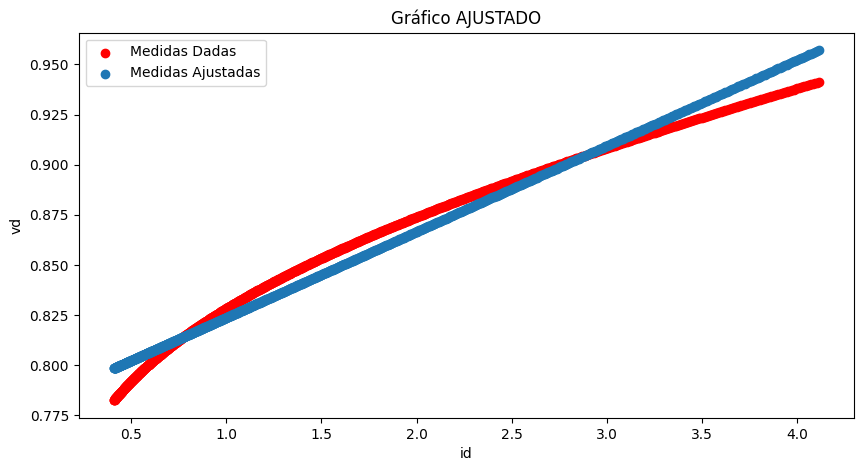

In [9]:
#Gerando o gráfico com as medidas e comparando com o ajuste
fig = plt.figure(figsize=(10,5)) 
plt.scatter(Xi, Yi, label = "Medidas Dadas", color='r')
plt.scatter(Xi, Ya, label = "Medidas Ajustadas")
plt.xlabel('id')
plt.ylabel('vd')
plt.title('Gráfico AJUSTADO')
plt.legend()  
plt.plot(Xi, Ya)

#Salva a figura em uma pasta gerada
fig.savefig('lineplot.jpg', bbox_inches='tight', dpi=150)
plt.show() 

**Análise Comparativa**

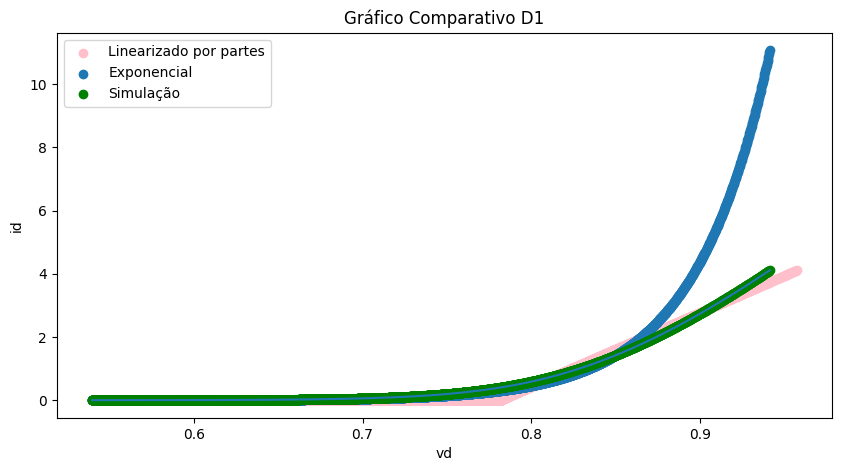

In [10]:
#Gerando o gráfico com as medidas e comparando com o ajuste
fig = plt.figure(figsize=(10,5)) 

#Metodo Exponencial
i_s = 7.448499121897491e-09
nphit = 1.714022613825497 * 0.026
id_exp = i_s * np.exp(vd/(nphit))

#MetodoLinearizado por partes
vd0 = b
rd = a

vd_partes_conduz = vd0 + (rd * id)
posicao_vd0 = np.argmax(vd > vd0)

vd_partes_zeros = vd[:posicao_vd0]
id_partes_zeros = np.zeros(len(vd_partes_zeros))

vd_partes = np.concatenate((vd_partes_zeros, vd_partes_conduz))
id_partes = np.concatenate((id_partes_zeros, id))

plt.scatter(vd_partes, id_partes, label = "Linearizado por partes", color='pink')
plt.scatter(vd, id_exp, label = "Exponencial")
plt.scatter(vd, id, label = "Simulação", color= 'green')
plt.xlabel('vd')
plt.ylabel('id')
plt.title('Gráfico Comparativo D1')
plt.legend()  
plt.plot(vd, id)
plt.show() 